# Data loading and formating

In [1]:
import rasterio
from rasterio import plot
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


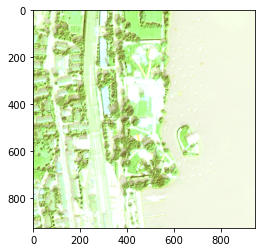

<AxesSubplot:>

In [2]:
# read the pixels' values (RGB + IR)
dataset = rasterio.open('Zurich_dataset_v1.0/images_tif/zh3.tif')
image = dataset.read([1,2,3,4])
plot.show(image)

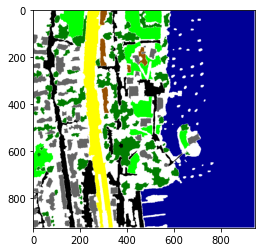

<AxesSubplot:>

In [5]:
# read and reformat the labels
dataset = rasterio.open('Zurich_dataset_v1.0/groundtruth/zh3_GT.tif')
labels = dataset.read([1,2,3])
plot.show(labels)

In [6]:
# put the data into a "good shape"
print("size of the image: ",image.shape, "and of the ground truth: ", labels.shape)
x = image.transpose(2,1,0).reshape(-1,4)
y = np.sum(labels.transpose(2,1,0).reshape(-1,3), axis=1)
print("size of the dataset: ",x.shape, "and of the labels: ", y.shape)

size of the image:  (4, 926, 943) and of the ground truth:  (3, 926, 943)
size of the dataset:  (873218, 4) and of the labels:  (873218,)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=2000, random_state=1)

In [8]:
x_train.shape

(2000, 4)